In [14]:
import torch
from torch import nn 
from d2l import torch as d2l

In [15]:
class BiRNNScratch(d2l.Module):
  def __init__(self, num_inputs, num_hiddens, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.f_rnn = d2l.RNNScratch(num_inputs, num_hiddens, sigma) # Foward RNN
    self.b_rnn = d2l.RNNScratch(num_inputs, num_hiddens, sigma) # Backward RNN
    self.num_hiddens *= 2 # The output dimension will be doubled since we have 2 parralel though opposite network


In [16]:
@d2l.add_to_class(BiRNNScratch)
def forward(self, inputs, Hs=None):
    """
    f_ : foward_
    b_ : backward_
    """
    f_H, b_H = Hs if Hs is not None else (None, None)
    f_outputs, f_H = self.f_rnn(inputs, f_H)
    b_outputs, b_H = self.b_rnn(reversed(inputs), b_H)
    outputs = [torch.cat((f, b), -1) for f, b in zip(f_outputs, reversed(b_outputs))]
    return outputs, (f_H, b_H)

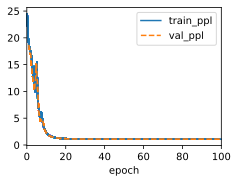

In [17]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn_block = BiRNNScratch(num_inputs=len(data.vocab),
num_hiddens=32 )
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [21]:
model.predict('time', 20, data.vocab, d2l.try_gpu())

'timememememememememememe'

- Concise implementation

In [ ]:
class BiGRU(d2l.RNN):
  def __init__(self, num_inputs, num_hiddens):
    d2l.Module.__init__(self)
    self.save_hyperparameters()
    self.rnn = nn.GRU(num_inputs, num_hiddens, bidirectional=True)
    self.num_hiddens *= 2